In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re, h5py

BASE_FOLDER = "./raw"
cities = [re.search(r".*/([A-Z]+)", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/*/")]
print(cities)


['BARCELONA', 'MOSCOW', 'ANTWERP', 'BANGKOK']


In [3]:
def load_h5_file(filename):
    with h5py.File(filename) as fr:
        return np.array(fr.get("array"))

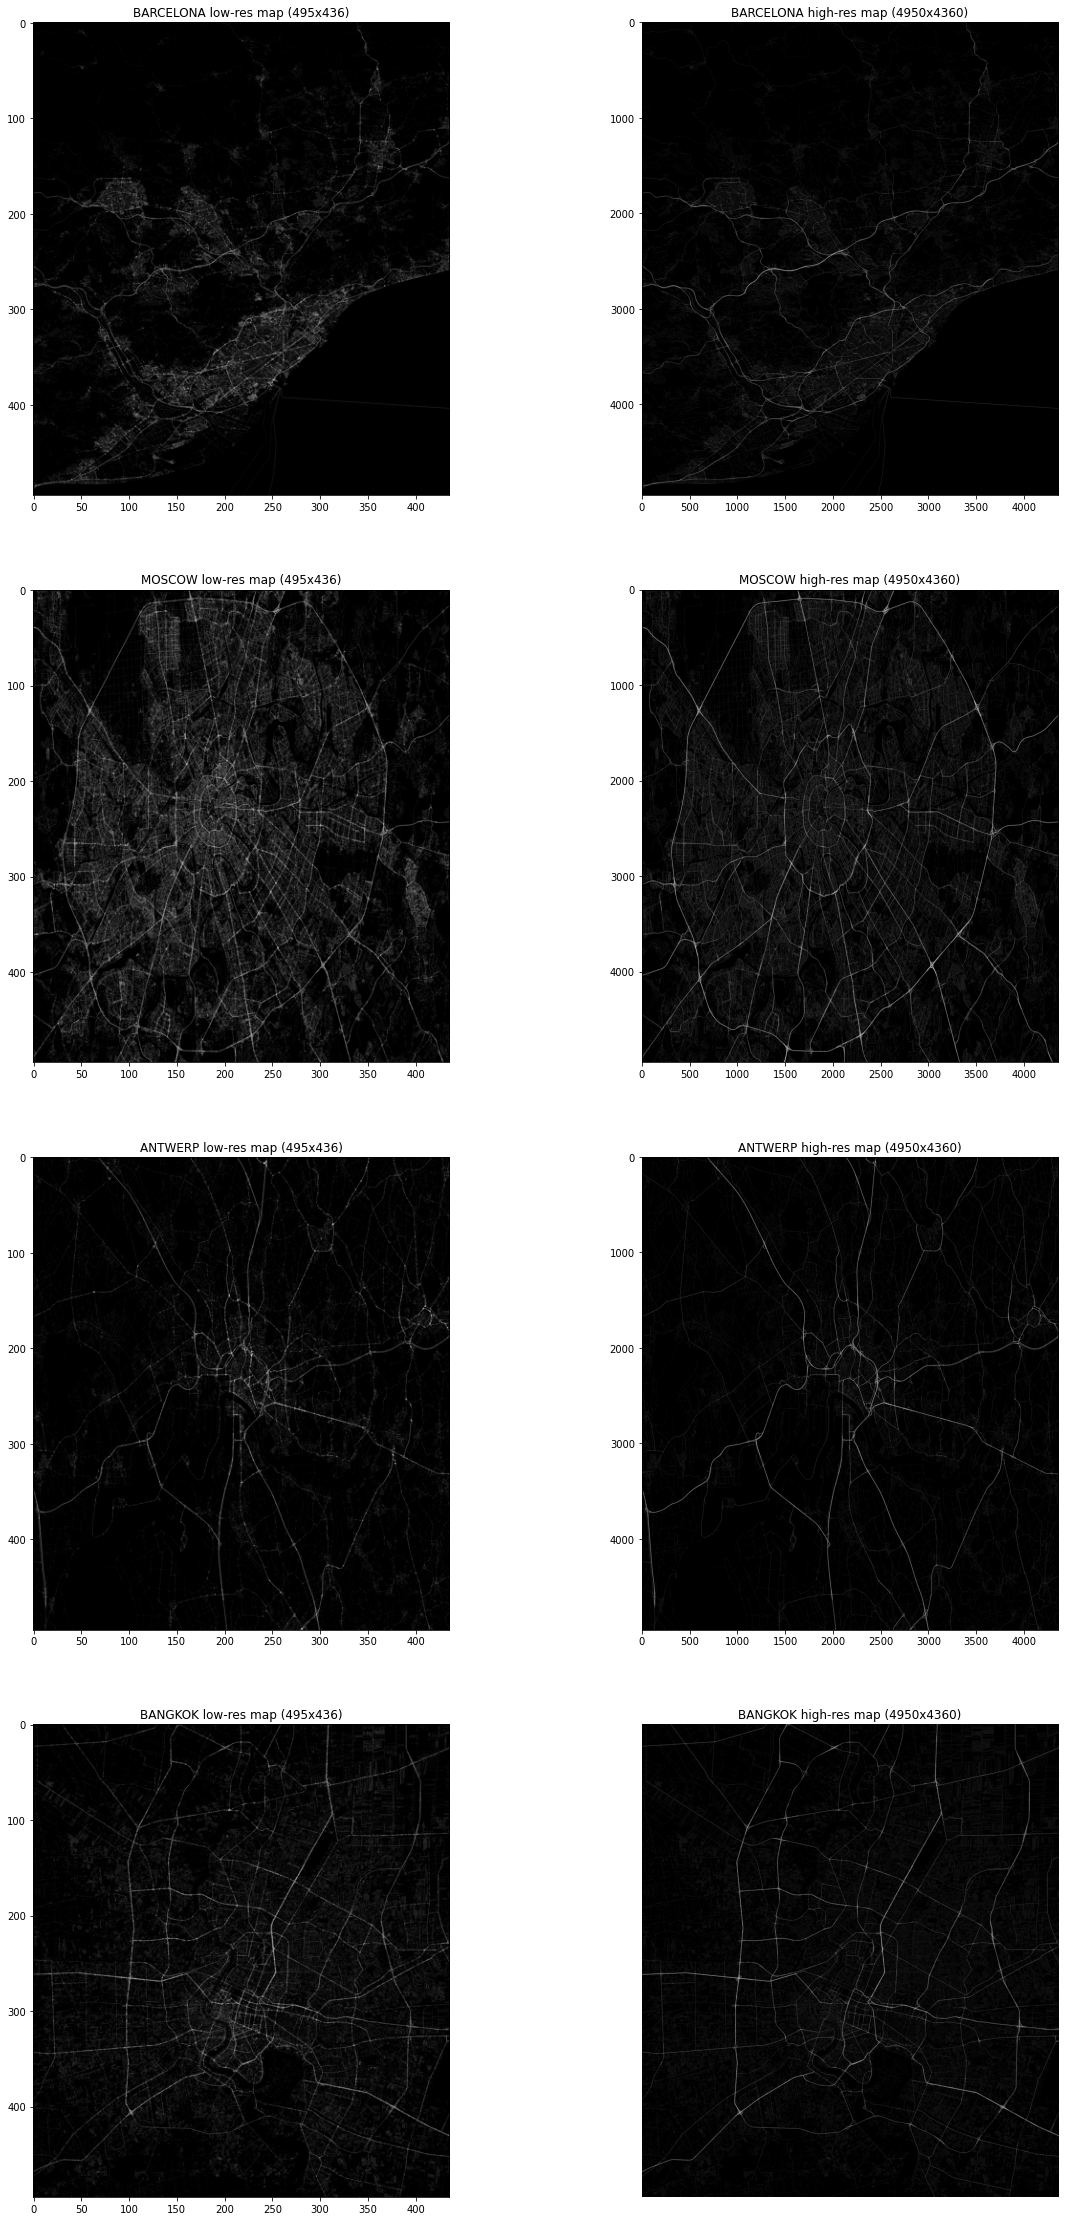

In [4]:
rows = len(cities)
cols = 2
scale_factor = 10
fig, axs = plt.subplots(rows, cols, figsize=(cols * scale_factor, rows * scale_factor))

for i, city in enumerate(cities):
    static_mask_once = load_h5_file(f"{BASE_FOLDER}/{city}/{city}_static.h5")[0]
    axs[i, 0].set_title(f"{city} low-res map (495x436)")
    axs[i, 0].imshow(static_mask_once[0:495, 0:436], cmap="gray", vmin=0, vmax=255)
    base_map = load_h5_file(f"{BASE_FOLDER}/{city}/{city}_map_high_res.h5")
    plt.axis("off")
    axs[i, 1].imshow(base_map[0:4950, 0:4360], cmap="gray", vmin=0, vmax=255)
    axs[i, 1].set_title(f"{city} high-res map (4950x4360)")
plt.show()